In [1]:
import pandas as pd 
pd.options.display.float_format = '{:,.3f}'.format
import numpy as np
import os
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.spatial import distance  

In [10]:
### T2 ###

# DATALIFT
data_t2c1 = pd.read_excel("../20220930_1406_DATALIFT_ANSI_C136_50_120V_T2C1.xls")
data_t2c2 = pd.read_excel("../20220930_1413_DATALIFT_ANSI_C136_50_120V_T2C2.xls")
data_t2c3 = pd.read_excel("../20220930_1456_DATALIFT_ANSI_C136_50_120V_T2C3.xls")
data_t2c4 = pd.read_excel("../20220930_1542_DATALIFT_ANSI_C136_50_120V_T2C4.xls")
data_t2c5 = pd.read_excel("../20220930_1524_DATALIFT_ANSI_C136_50_120V_T2C5.xls")
data_t2c6 = pd.read_excel("../20220930_1538_DATALIFT_ANSI_C136_50_120V_T2C6.xls")
data_t2c7 = pd.read_excel("../20220930_1534_DATALIFT_ANSI_C136_50_120V_T2C7.xls")

# data_t2c1 = pd.read_excel("../20220809_1348_DATALIFT_ANSIS_C136_50_277V_T2C1.xls")
# data_t2c2 = pd.read_excel("../20220809_1352_DATALIFT_ANSIS_C136_50_277V_T2C2.xls")
# data_t2c3 = pd.read_excel("../20220809_1411_DATALIFT_ANSIS_C136_50_277V_T2C3.xls")
# data_t2c4 = pd.read_excel("../20220809_1422_DATALIFT_ANSIS_C136_50_277V_T2C4.xls")
# data_t2c5 = pd.read_excel("../20220809_1429_DATALIFT_ANSIS_C136_50_277V_T2C5.xls")
# data_t2c6 = pd.read_excel("../20220809_1435_DATALIFT_ANSIS_C136_50_277V_T2C6.xls")
# data_t2c7 = pd.read_excel("../20220809_1438_DATALIFT_ANSIS_C136_50_277V_T2C7.xls")

# MESH
# data_t2c1 = pd.read_excel("../20220930_1122_MESH_ANSI_C136_50_120V_T2C1.xls")
# data_t2c2 = pd.read_excel("../20220930_1126_MESH_ANSI_C136_50_120V_T2C2.xls")
# data_t2c3 = pd.read_excel("../20220930_1204_MESH_ANSI_C136_50_120V_T2C3.xls")
# data_t2c4 = pd.read_excel("../20220930_1228_MESH_ANSI_C136_50_120V_T2C4.xls")
# data_t2c5 = pd.read_excel("../20220930_1241_MESH_ANSI_C136_50_120V_T2C5.xls")
# data_t2c6 = pd.read_excel("../20220930_1248_MESH_ANSI_C136_50_120V_T2C6.xls")
# data_t2c7 = pd.read_excel("../20220930_1253_MESH_ANSI_C136_50_120V_T2C7.xls")

# data_t2c1 = pd.read_excel("../20220810_0802_MESH_ANSI_C136_50_277V_T2C1.xls")
# data_t2c2 = pd.read_excel("../20220810_0804_MESH_ANSI_C136_50_277V_T2C2.xls")
# data_t2c3 = pd.read_excel("../20220810_0821_MESH_ANSI_C136_50_277V_T2C3.xls")
# data_t2c4 = pd.read_excel("../20220810_0832_MESH_ANSI_C136_50_277V_T2C4.xls")
# data_t2c5 = pd.read_excel("../20220810_0838_MESH_ANSI_C136_50_277V_T2C5.xls")
# data_t2c6 = pd.read_excel("../20220810_0841_MESH_ANSI_C136_50_277V_T2C6.xls")
# data_t2c7 = pd.read_excel("../20220810_0847_MESH_ANSI_C136_50_277V_T2C7.xls")

error_class = 0.5/100

test_pre = [data_t2c1, data_t2c2, data_t2c3, data_t2c4, data_t2c5, data_t2c6, data_t2c7]
# test_pre = [data_t2c1, data_t2c2, data_t2c3, data_t2c4, data_t2c5, data_t2c6, data_t2c7, data_t2c8, data_t2c9]
test_pos = []

for df_condition in test_pre:
    df_raw = pd.DataFrame()
    df_raw['PM s'] = df_condition['PM Sec'] - df_condition['PM Sec'][0]
    df_raw['G4 s'] = df_condition['G4 time stamp [s]'] - df_condition['G4 time stamp [s]'][0]
    df_raw['PM Wh'] = df_condition['PM Whr'] - df_condition['PM Whr'][0]
    df_raw['G4 Wh pre'] = df_condition['G4 active energy [Wh]'] - df_condition['G4 active energy [Wh]'][0]
    df_raw['PM Vrms'] = df_condition['PM Vrms']
    df_raw['PM Arms'] = df_condition['PM Arms']
    df = pd.DataFrame(
        data={
            "G4 Wh": np.interp(df_raw['PM s'], df_raw['G4 s'], df_raw['G4 Wh pre']),
            "G4 Vrms": np.interp(df_raw['PM s'], df_raw['G4 s'], df_condition['G4 voltage [V]']),
            "G4 Arms": np.interp(df_raw['PM s'], df_raw['G4 s'], df_condition['G4 current [A]'])
        }
    )
    df_raw = pd.concat([df_raw, df], axis=1)

    df_raw["Error"] = 100*(df_raw["G4 Wh"]-df_raw['PM Wh'])/df_raw['PM Wh']
    df_raw["Voltage_Error"] = 100*(df_raw["G4 Vrms"]-df_raw['PM Vrms'])/df_raw['PM Vrms']
    df_raw["Current_Error"] = 100*(df_raw["G4 Arms"]-df_raw['PM Arms'])/df_raw['PM Arms']
    print(f'Max Raw Error: {df_raw["Error"].abs().max()}')
    df_raw = df_raw.drop(0)
    test_pos.append(df_raw)

print(f'Measurement: {test_pos[0]["G4 Wh"][10]} Wh')
print(f'Reference: {test_pos[0]["PM Wh"][10]} Wh')
reference = 100*(test_pos[0]['G4 Wh'][10]-test_pos[0]['PM Wh'][10])/test_pos[0]['PM Wh'][10]
print(f'Reference Error: {(100+reference):1.2f} %')
print(f'Upper Error: {(100+reference+100*error_class):1.2f} %')
print(f'Lower Error: {(100+reference-100*error_class):1.2f} %')
print(reference)
print(reference+100*error_class)
print(reference-100*error_class)
df_limits = pd.DataFrame()
df_limits['Max_Error'] = (reference+100*error_class)*np.ones(len(df_raw['PM s']))
df_limits['Min_Error'] = (reference-100*error_class)*np.ones(len(df_raw['PM s']))
df_limits['Max_Class_Error'] = 100*error_class*np.ones(len(df_raw['PM s']))
df_limits['Min_Class_Error'] = -100*error_class*np.ones(len(df_raw['PM s']))

Max Raw Error: 0.10128572740703014
Max Raw Error: 0.219806880986704
Max Raw Error: 0.03950055318005291
Max Raw Error: 0.1715453329121555
Max Raw Error: 0.26521431346452307
Max Raw Error: 0.1267006470598805
Max Raw Error: 1.2530852713640945
Measurement: 10.298614485710587 Wh
Reference: 10.29241 Wh
Reference Error: 100.06 %
Upper Error: 100.56 %
Lower Error: 99.56 %
0.06028214684983146
0.5602821468498315
-0.43971785315016854


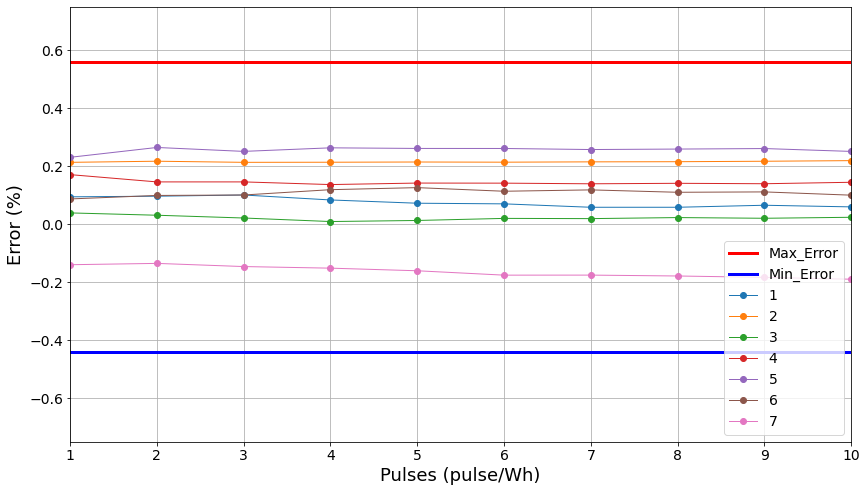

In [11]:
# Raw Reference visualization
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
ax = plt.gca()

sizeh = 14
sizev = 8

df_limits.plot(y='Max_Error', ax=ax, figsize=(sizeh, sizev), label="Max_Error", linewidth=3, color='red')
df_limits.plot(y='Min_Error', ax=ax, figsize=(sizeh, sizev), label="Min_Error", linewidth=3, color='blue')
# ax.fill_between(test_pos[1]['PM s'], test_pos[1]['Max_Error'], test_pos[1]['Min_Error'], facecolor ='green', alpha = 0.10)

for index, df_raw in enumerate(test_pos):
    df_raw.plot(y='Error', ax=ax, figsize=(sizeh, sizev), label=index+1, linewidth=1, marker='o')
    ax.set_xlabel("Pulses (pulse/Wh)", fontsize=18)
    ax.set_ylabel("Error (%)", fontsize=18)
    plt.axis((1, 10, -0.75, 0.75))
    plt.legend(loc=4, fontsize = 14)
    plt.grid(True)

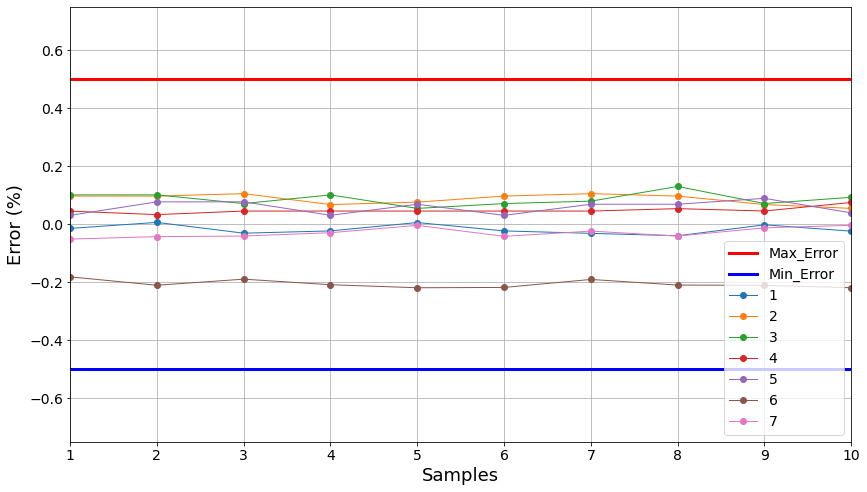

In [8]:
# Raw Reference visualization
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
ax = plt.gca()

sizeh = 14
sizev = 8

df_limits.plot(y='Max_Class_Error', ax=ax, figsize=(sizeh, sizev), label="Max_Error", linewidth=3, color='red')
df_limits.plot(y='Min_Class_Error', ax=ax, figsize=(sizeh, sizev), label="Min_Error", linewidth=3, color='blue')
# ax.fill_between(test_pos[1]['PM s'], test_pos[1]['Max_Error'], test_pos[1]['Min_Error'], facecolor ='green', alpha = 0.10)

for index, df_raw in enumerate(test_pos):
    df_raw.plot(y='Voltage_Error', ax=ax, figsize=(sizeh, sizev), label=index+1, linewidth=1, marker='o')
    ax.set_xlabel("Samples", fontsize=18)
    ax.set_ylabel("Error (%)", fontsize=18)
    plt.axis((1, 10, -0.75, 0.75))
    plt.legend(loc=4, fontsize = 14)
    plt.grid(True)

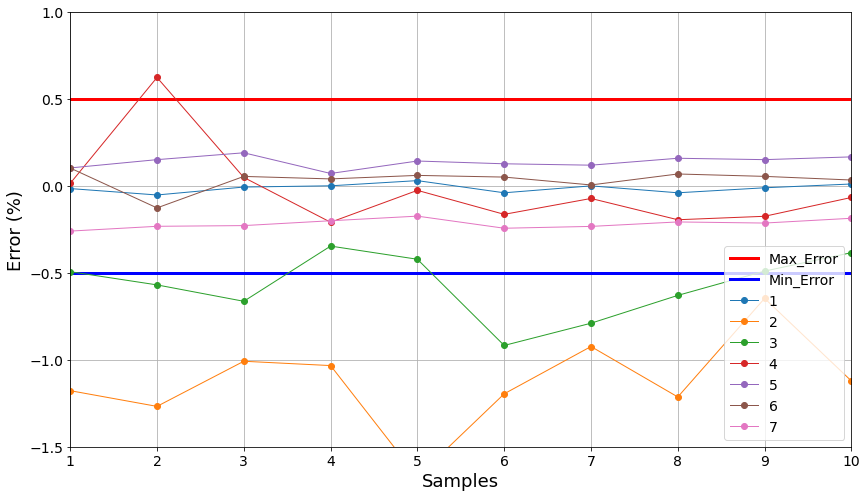

In [9]:
# Raw Reference visualization
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
ax = plt.gca()

sizeh = 14
sizev = 8

df_limits.plot(y='Max_Class_Error', ax=ax, figsize=(sizeh, sizev), label="Max_Error", linewidth=3, color='red')
df_limits.plot(y='Min_Class_Error', ax=ax, figsize=(sizeh, sizev), label="Min_Error", linewidth=3, color='blue')
# ax.fill_between(test_pos[1]['PM s'], test_pos[1]['Max_Error'], test_pos[1]['Min_Error'], facecolor ='green', alpha = 0.10)

for index, df_raw in enumerate(test_pos):
    df_raw.plot(y='Current_Error', ax=ax, figsize=(sizeh, sizev), label=index+1, linewidth=1, marker='o')
    ax.set_xlabel("Samples", fontsize=18)
    ax.set_ylabel("Error (%)", fontsize=18)
    plt.axis((1, 10, -1.5, 1))
    plt.legend(loc=4, fontsize = 14)
    plt.grid(True)